In [85]:
library(ggplot2)

# 1. Asumsi Normalitas
***

## Distribusi Normal

Data kebanyakan berada di tengah (direpresentasikan dengan kurva berbentuk lonceng).<br> 
Untuk dapat dikatakan normal, maka **nilai kemencengan dan kurtosis seharusnya nol**.

Penyimpangan dari distribusi normal dapat disebabkan dua hal:
+ __Kemencengan (*skewness*)__
Indikator yang menunjukkan derajat kesimetrian suatu distribusi.<br>
    - Negatively skewed - Skewness yang bernilai negatif berarti ekor distribusi berada di sebelah kiri, menunjukkan bahwa sebagian besar nilai berada di sisi kanan kurva.
    - Positively skewed - Skewness yang bernilai positif berarti ekor distribusi berada di sebelah kanan, menunjukkan bahwa sebagian besar nilai berada di sisi kiri kurva.

+ __Kurtosis/Keruncingan (*tailedness/pointiness*)__
Indikator yang menunjukkan derajat keruncingan distribusi<br>
    - Leptokurtis-Jika nilai kurtosis lebih besar dari 3, maka kurva distribusi disebut leptokurtis.
    - Mesokurtis- Jika nilai kurtosis sama dengan 3.
    - Platikurtis - Jika lebih rendah dari 3, maka disebut platikurtis.

Nilai kemencengan dan keruncungin bisa dibah ke dalam nilai $z-score$ dengan cara:<br>
1. $z_{skewness}=\frac{S-0}{SE_{skewness}}$ <br><br>
2. $z_{kurtosiss}=\frac{K-0}{SE_{kurtosis}}$

In [3]:
data.norm<-read.delim("Festival.No.Outlier.dat", header=TRUE)
str(data.norm)

'data.frame':	810 obs. of  5 variables:
 $ ticknumb: int  2111 2229 2338 2384 2401 2405 2467 2478 2490 2504 ...
 $ gender  : chr  "Male" "Female" "Male" "Female" ...
 $ day1    : num  2.64 0.97 0.84 3.03 0.88 0.85 1.56 3.02 2.29 1.11 ...
 $ day2    : num  1.35 1.41 NA NA 0.08 NA NA NA NA 0.44 ...
 $ day3    : num  1.61 0.29 NA NA NA NA NA NA NA 0.55 ...


In [4]:
library(ggplot2)
hist.day1<-ggplot(
    data.norm, aes(day1))+
    geom_density( colour="black", fill="white", size=1)+
    labs(x="Hygene score on day 1", y="Density")

In [5]:
library(pastecs)
# Package for Analysis of Space-Time Ecological Series. Regularisation, decomposition and analysis of space-time series. 
stat.desc(cbind(data.norm$day1, data.norm$day2, data.norm$day3), basic=FALSE, norm=TRUE)

,V1,V2,V3
,<dbl>,<dbl>,<dbl>
median,1.79000000,7.900000e-01,7.600000e-01
mean,1.77113580,9.609091e-01,9.765041e-01
SE.mean,0.02436847,4.436095e-02,6.404352e-02
CI.mean.0.95,0.04783289,8.734781e-02,1.267805e-01
var,0.48099624,5.195239e-01,5.044934e-01
std.dev,0.69353892,7.207801e-01,7.102770e-01
coef.var,0.39157862,7.501022e-01,7.273672e-01
skewness,-0.00442835,1.082811e+00,1.007813e+00
skew.2SE,-0.02577395,3.611574e+00,2.309035e+00


In [9]:
#menggunakan pembulatan agar lebih terbaca paket psych
#round ini hanya untuk membulatkan saja, fungsi asli dimulai dari describe()
library(psych)
round(describe(data.norm[, c("day1", "day2", "day3")]), digits=3)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
day1,1,810,1.771,0.694,1.79,1.772,0.697,0.02,3.69,3.67,-0.004,-0.422,0.024
day2,2,264,0.961,0.721,0.79,0.869,0.608,0.00,3.44,3.44,1.083,0.755,0.044
day3,3,123,0.977,0.710,0.76,0.902,0.608,0.02,3.41,3.39,1.008,0.595,0.064


In [10]:
#pengukuran statistik yg sama dengan pembulatan dengan paket pastecs
round(stat.desc(data.norm[, c("day1", "day2", "day3")], basic=FALSE, norm=TRUE),digits=3)

,day1,day2,day3
,<dbl>,<dbl>,<dbl>
median,1.790,0.790,0.760
mean,1.771,0.961,0.977
SE.mean,0.024,0.044,0.064
CI.mean.0.95,0.048,0.087,0.127
var,0.481,0.520,0.504
std.dev,0.694,0.721,0.710
coef.var,0.392,0.750,0.727
skewness,-0.004,1.083,1.008
skew.2SE,-0.026,3.612,2.309


__Nilai kurtosis__ pada paket psych dan pastec agak berbeda karena, paket pscyh describe menggunakan unbiased estimate

# 2. Membaca Hasil Pengukuran Normalitas 
***

Deskripsi atas kemencengan dan keruncingan :

| a | day1|day2|day3|
|:--- |:--- |:--- |:--- |
| __skewness__ | -0.004 | 1.083  | 1.008  | 
| __kurtosis__  | -0.422  | 0.755  | 0.595  | 


Kemencengan (skewness) Indikator yang menunjukkan derajat kesimetrian suatu distribusi.<br>
__Day 1__<br>
* Terlihat bahwa terdapat sedikit kemencengan ke ke kiri, terdapat lebih banyak nilai di sisi kanan kurva.
* Platikurtis - Jika lebih rendah dari 3, maka disebut platikurtis.

Tidak hanya itu, tetapi dari gambar distribusi bisa dilihat bahwa day 1 mengalami bimodal, dua puncak.
Kita bisa juga menghitung nilai z:

In [17]:
skew_to_z <- function(skew, se) {
  skew_to_z <- (skew-0)/(se)
  return(skew_to_z)
}
kurt_to_z <- function(kurt, se) {
  kurt_to_z <- (kurt-0)/(se)
  return(kurt_to_z)
}

In [43]:
cat(" z for skewness", round(skew_to_z(-0.004,0.024),3), "\n","z for kurtosis", round(kurt_to_z(-0.422,0.024),3))

 z for skewness -0.167 
 z for kurtosis -17.583

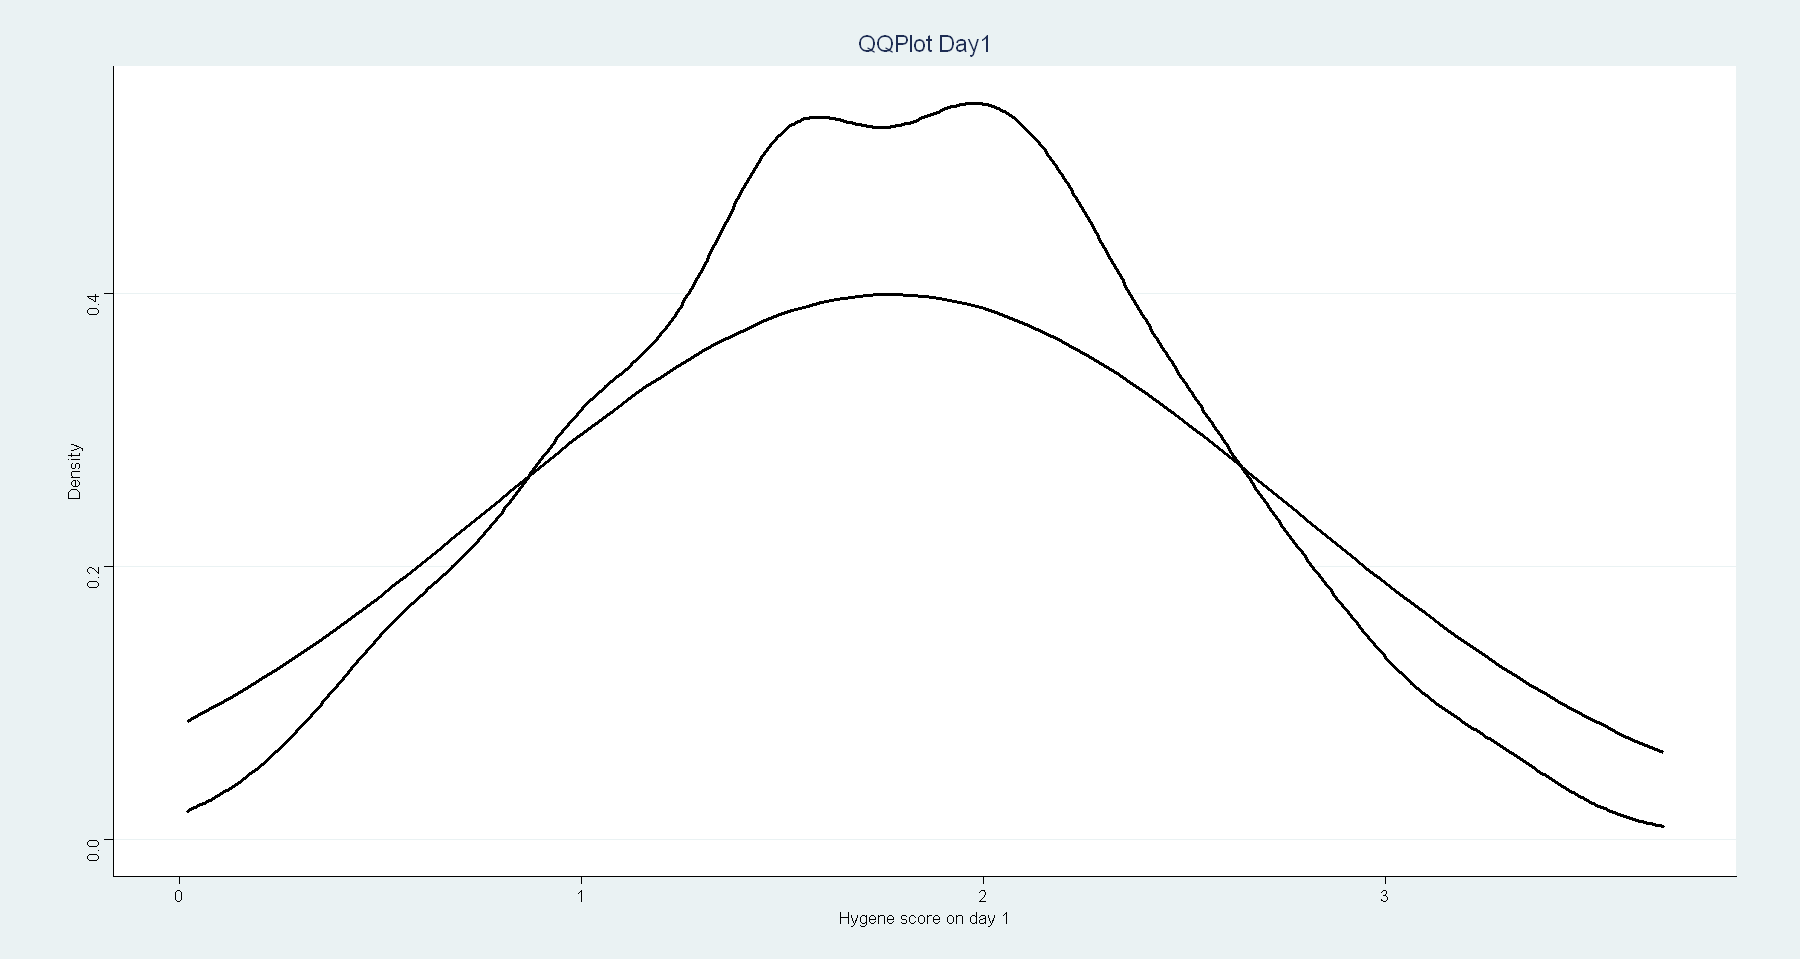

In [84]:
hist.day1+stat_function(
    fun=dnorm, 
    args=list(mean=mean(data.norm$day1, na.rm=TRUE)), 
    colour="black", size=1)+    
    labs(title = "QQPlot Day1")+
    theme_stata()

Warning message:
"Removed 546 rows containing non-finite values (stat_density)."


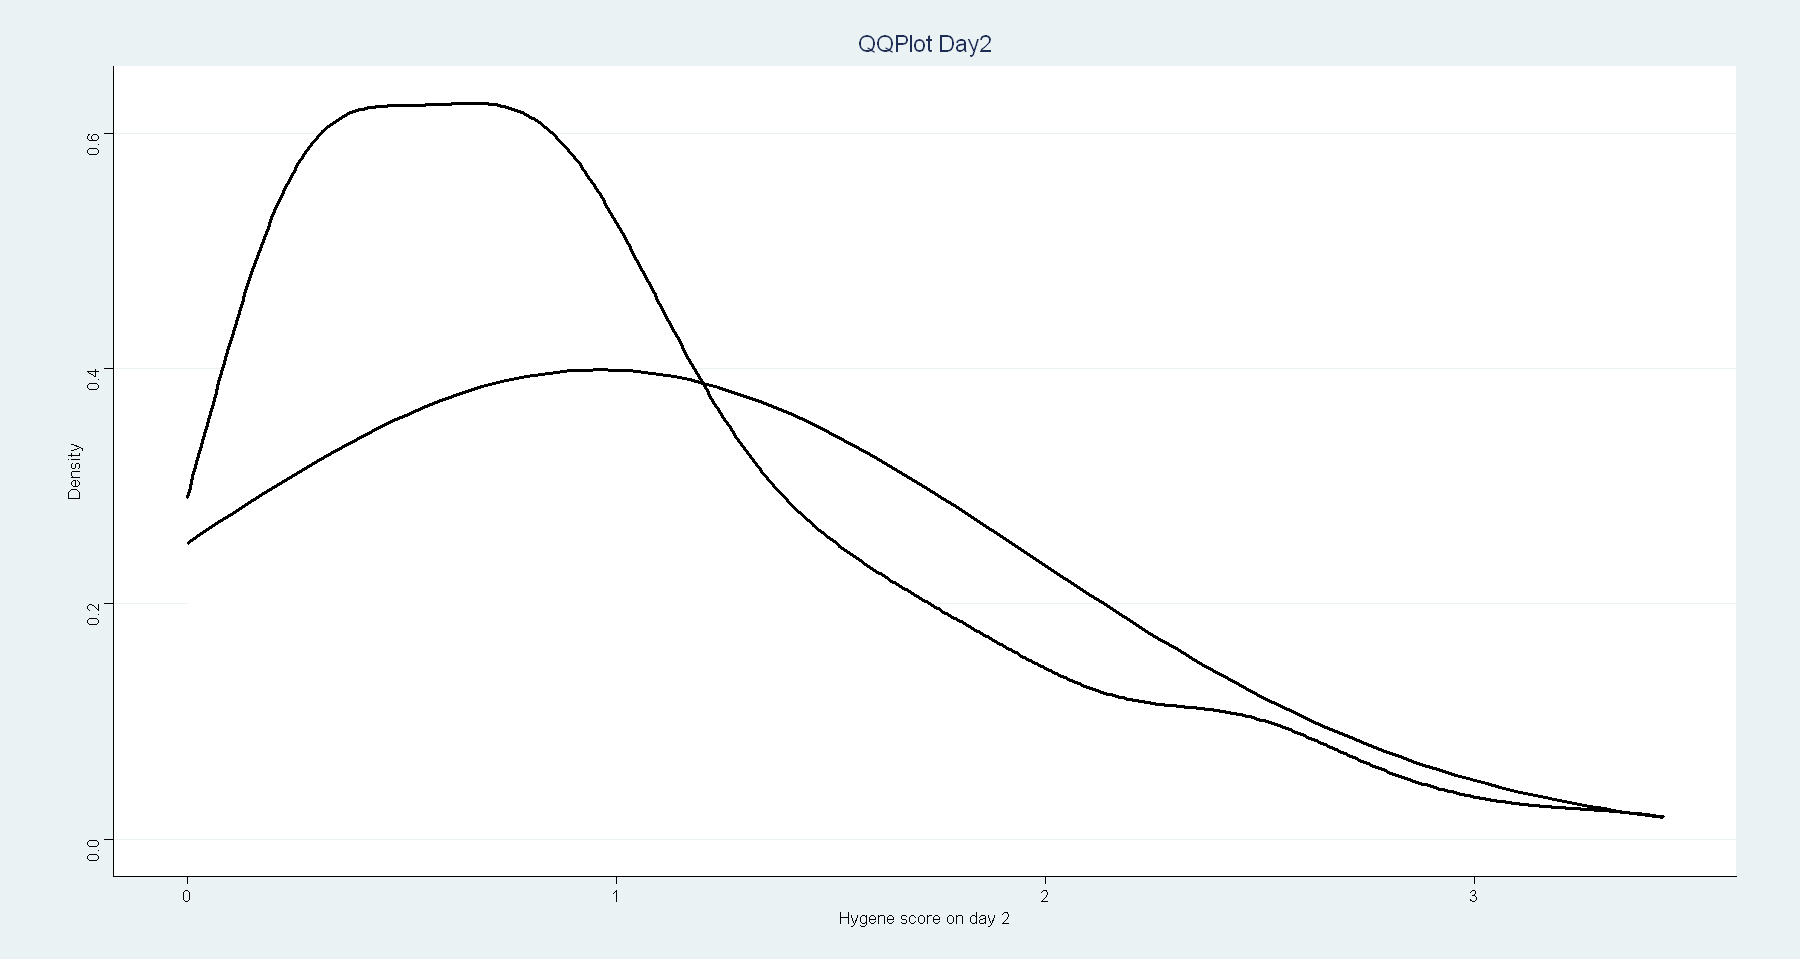

In [83]:
hist.day2<-ggplot(
    data.norm, aes(day2))+
    geom_density( colour="black", fill="white", size=1)+
    labs(x="Hygene score on day 2", y="Density")+
    labs(title = "QQPlot Day2")+
    theme_stata()
hist.day2+stat_function(
    fun=dnorm, 
    args=list(mean=mean(data.norm$day2, na.rm=TRUE)), 
    colour="black", size=1
)

Warning message:
"Removed 687 rows containing non-finite values (stat_density)."


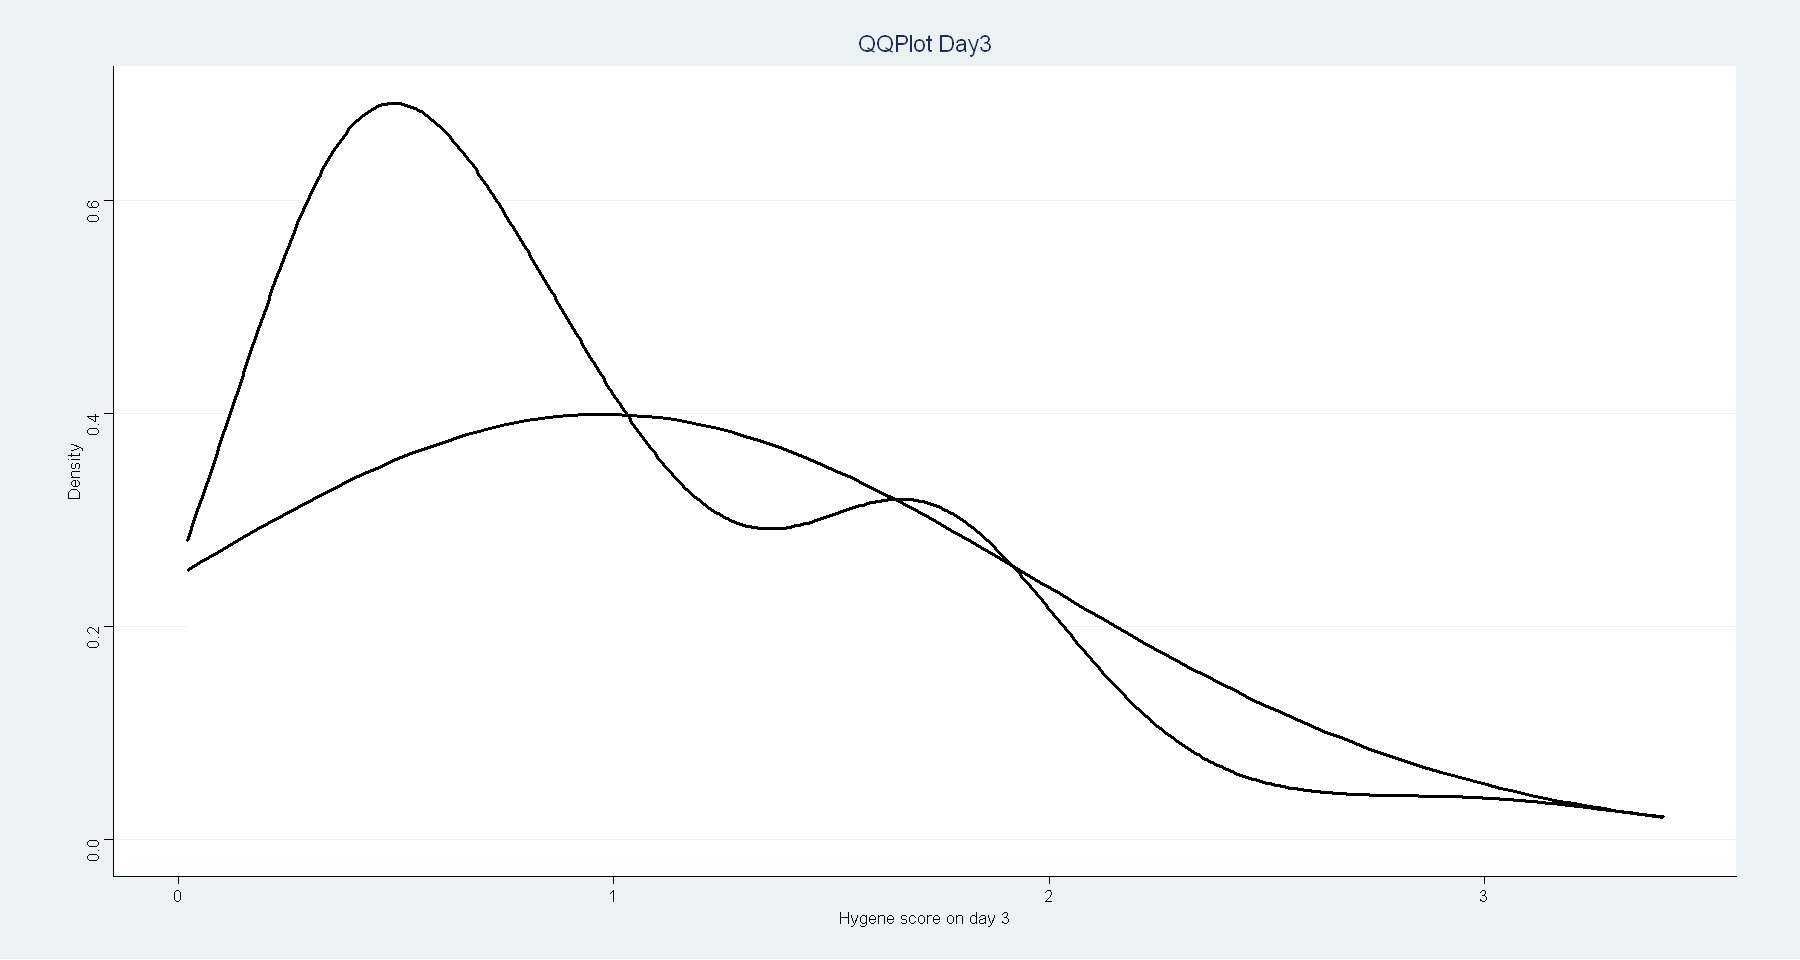

In [82]:
hist.day3<-ggplot(
    data.norm, aes(day3))+
    geom_density( colour="black", fill="white", size=1)+
    labs(x="Hygene score on day 3", y="Density")+
    labs(title = "QQPlot Day3")+
    theme_stata()
hist.day3+stat_function(
    fun=dnorm, 
    args=list(mean=mean(data.norm$day3, na.rm=TRUE)), 
    colour="black", size=1
)

# 3. QQ Plot

Warning message:
"Removed 687 rows containing non-finite values (stat_qq)."


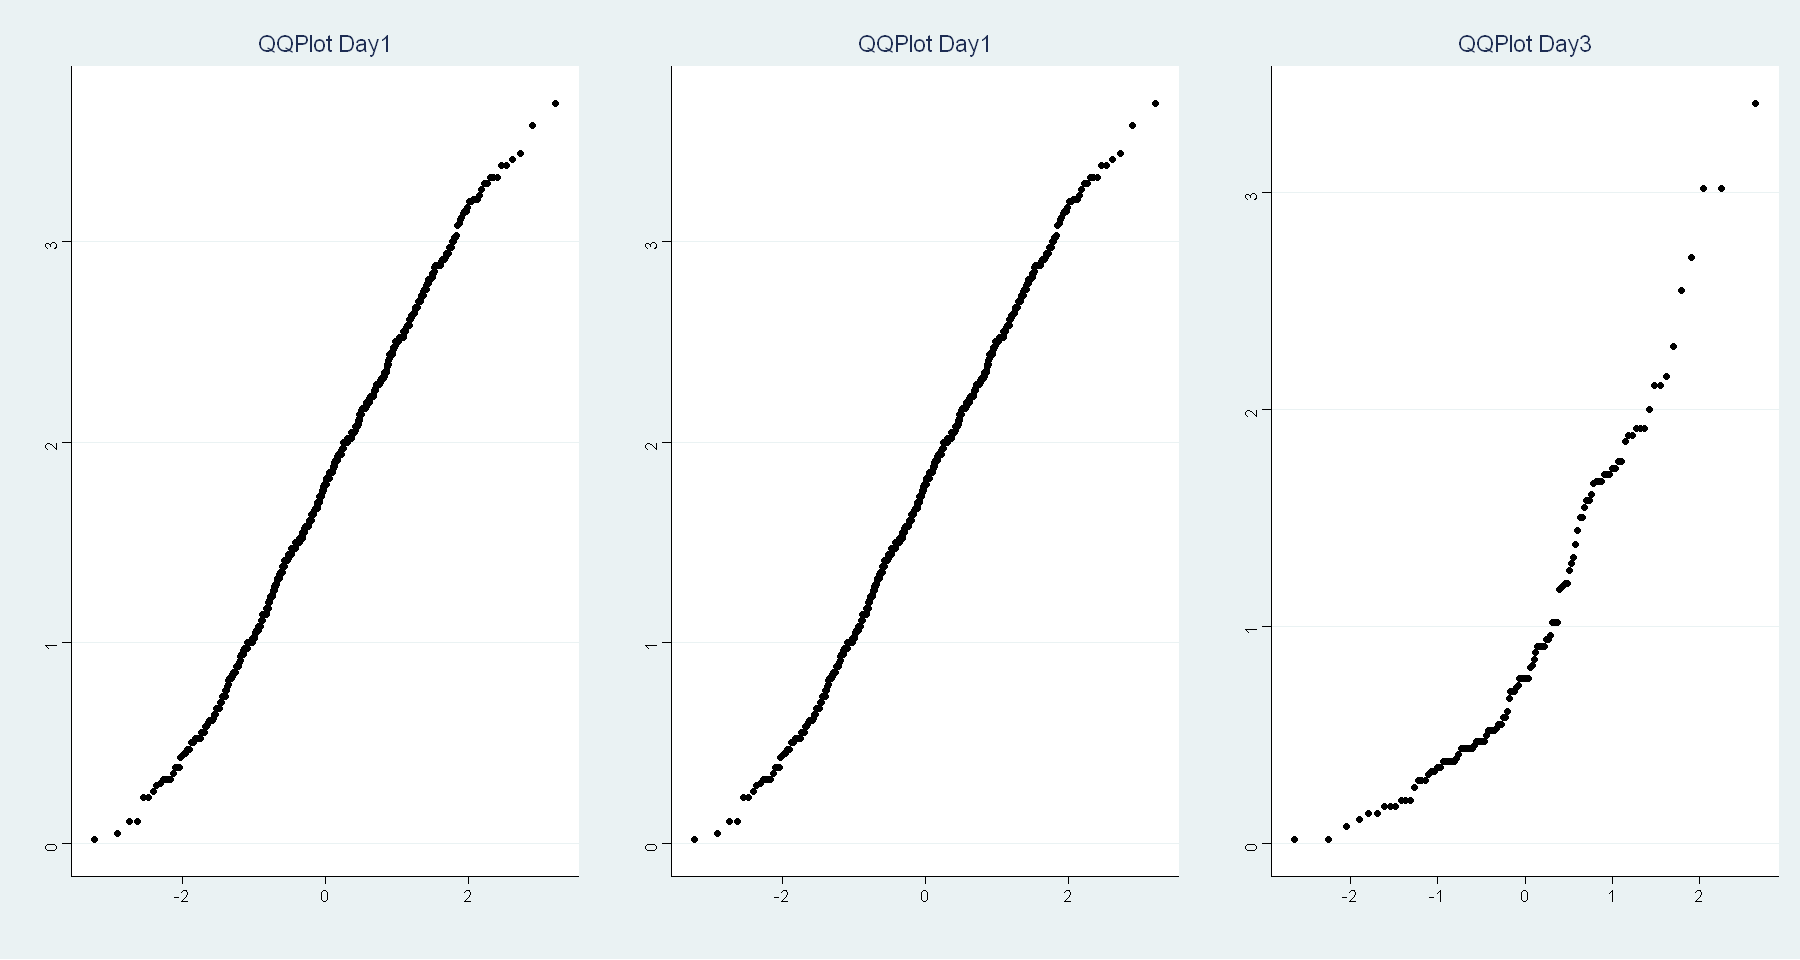

In [69]:
library(ggplot2)
library(ggthemes)
library(gridExtra)
qqplot.day1<-qplot(sample=data.norm$day1)+
labs(title = "QQPlot Day1")+
theme_stata()
#qqplot.day1
qqplot.day2<-qplot(sample=data.norm$day2)+
labs(title = "QQPlot Day2")+
theme_stata()
#qqplot.day2
qqplot.day3<-qplot(sample=data.norm$day3)+
labs(title = "QQPlot Day3")+
theme_stata()
#qqplot.day3
options(repr.plot.width=15, repr.plot.height=8) 
grid.arrange(qqplot.day1, qqplot.day1, qqplot.day3, nrow = 1)

# 4. Shapiro-Wilk Test 

Membandingkan metode uji normalitas ini efektif dan valid digunakan untuk sampel berjumlah kecil. 
Indikator:
+ Jika $p<.05$ distribusi sampel berbeda jauh dengan distribusi populasi
+ Jika $p>.05$ distribusi sampel tidak terlalu berbeda jauh dengan distribusi populasi

Namun, test ini tidak terlalu baik untuk data yang jumlahnya besar, karena akan sangat mudah untuk menjadi normal.

In [56]:
data.exam<-read.delim("RExam.dat", header=TRUE)
head(data.exam, size=5)

,exam,computer,lectures,numeracy,uni
,<int>,<int>,<dbl>,<int>,<int>
1,18,54,75.0,7,0
2,30,47,8.5,1,0
3,40,58,69.5,6,0
4,30,37,67.0,6,0
5,40,53,44.5,2,0
6,15,48,76.5,8,0


In [62]:
shapiro.test(data.exam$exam)
shapiro.test(data.exam$numeracy)


	Shapiro-Wilk normality test

data:  data.exam$exam
W = 0.96131, p-value = 0.004991



	Shapiro-Wilk normality test

data:  data.exam$numeracy
W = 0.92439, p-value = 2.424e-05
